In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from healpix_plot import default_plot, get_listed_colormap
from healpix_functions import aggregate_grid_xarray
path = 'data'
figpath = 'figures_paper'

mpl.rc('font', **{'size': 8})
proj = ccrs.Mollweide()
cm = 1/2.54  # centimeters in inches

ERROR 1: PROJ: proj_create_from_database: Open of /home/b/b381815/miniconda3/envs/py/share/proj failed


In [9]:
data_dict = {}
for index in ['txx', 'su', 'wsdi']:
    data_dict[index] = {}
    for model in ['ICON-ngc4008', 'IFS-9-FESOM-5-production']:
        da = xr.open_dataset(os.path.join(
            path, model, 'z9', f'{index}_ann_{model}_ssp370_zoom9.nc'), decode_timedelta=False)[index]
        da = da.drop_vars('crs')  # drop grid info 
        data_dict[index][model] = aggregate_grid_xarray(da, z_out=6, method='std').mean('time')

In [4]:
levels_txx = [0, .5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
levels_su = [0, 5, 10, 15, 20, 25, 50, 100, 150]
levels_wsdi = np.arange(0, 11, 1)

kwargs_dict = dict(
    txx = dict(
        cmap=get_listed_colormap(levels_txx, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_txx, 
        extend='max',
        cbar_kwargs={'ticks': levels_txx[::2]},
    ),
    su = dict(
        cmap=get_listed_colormap(levels_su, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_su, 
        extend='max',
    ),
    wsdi = dict(
        cmap=get_listed_colormap(levels_wsdi, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_wsdi, 
        extend='max',
    ),
)

title_dict = {
    'txx': 'Annual maximum of daily maximum temperature (°C)',
    'su': 'Annual count of days where maximum temperature exceeds 25°C (days)',
    'wsdi': 'Annual count of warm spell days (days)',
}

label_dict = {0: '(a)', 1: '(b)', 2: '(c)', 3: '(d)', 4: '(e)', 5: '(f)'}

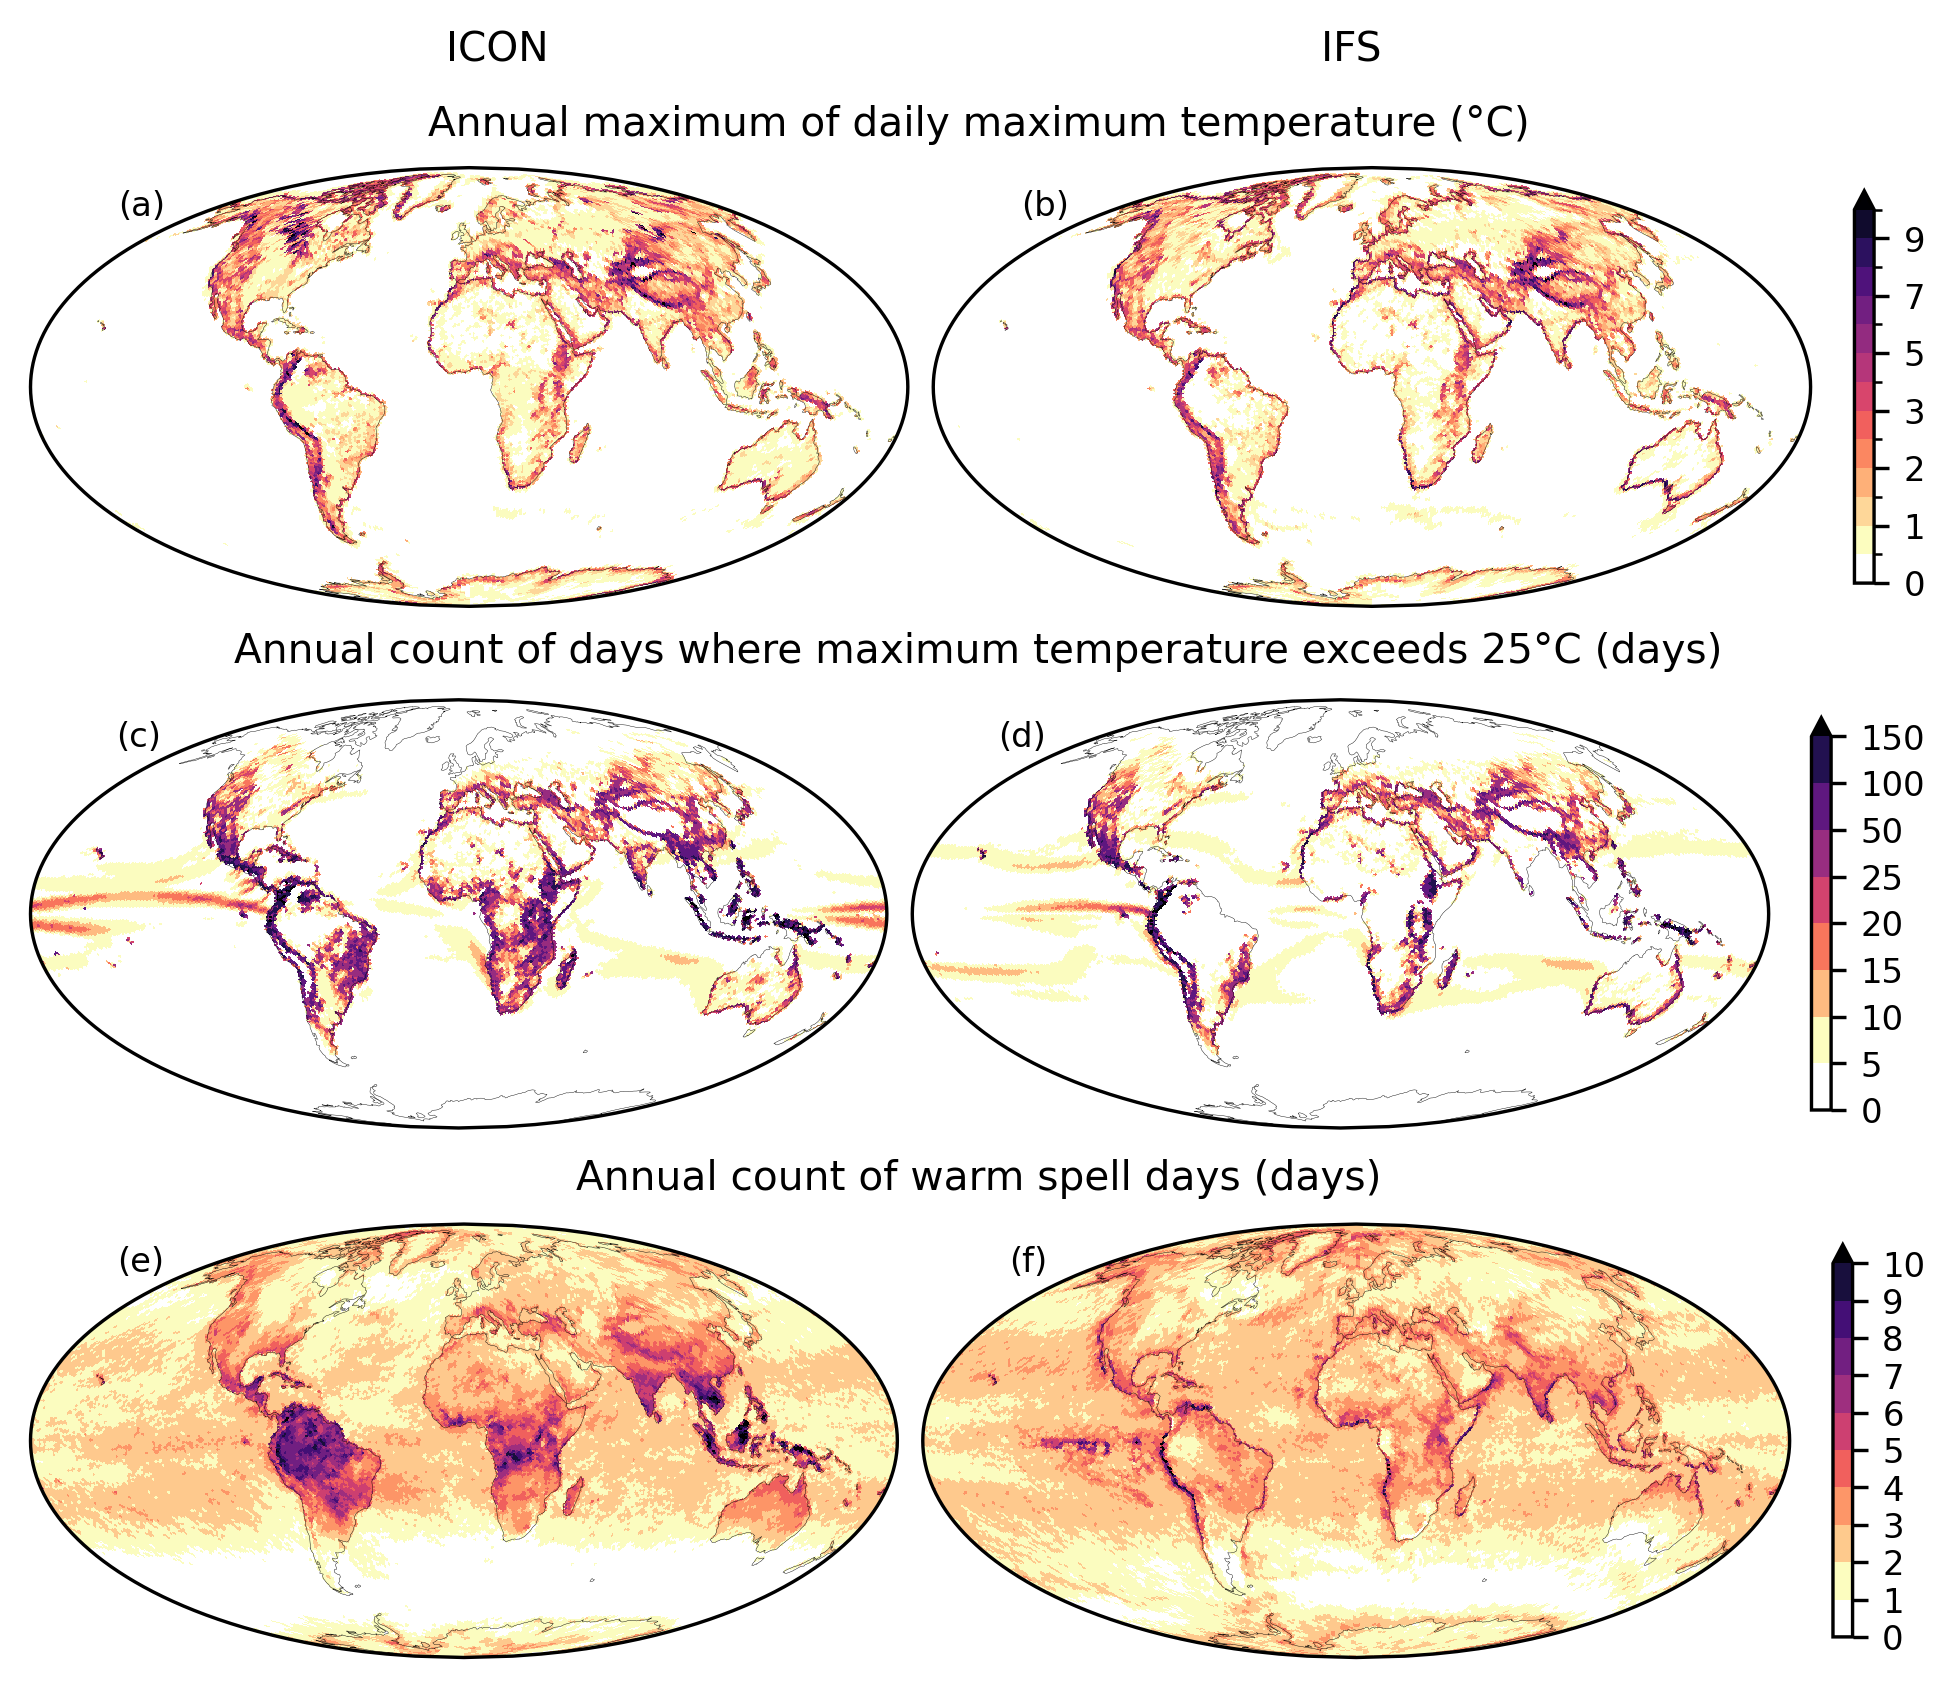

In [10]:
dpi = 305  # NOTE: depending on the exact resolutoin there sometimes is a an atrifact at the zero meridian

fig = plt.figure(layout='constrained', figsize=(16*cm, 14*cm), dpi=dpi)
fig.suptitle('ICON' + ' ' * 60 + 'IFS' + ' '*10 + '\n')

subfigs = fig.subfigures(nrows=3, ncols=1)

idx = 0
for index, subfig in zip(data_dict, subfigs):
    
    subfig.suptitle(title_dict[index], y=.97, va='bottom')
    
    axes = subfig.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj})

    for model, ax in zip(data_dict[index], axes):
        ax.text(0.1, .95, label_dict[idx], ha='left', va='top', transform=ax.transAxes)
        ax.set_global()
        default_plot(data_dict[index][model], ax=ax, add_colorbar=False if idx % 2 == 0 else True, **kwargs_dict[index])
        idx += 1

fig.savefig(os.path.join(figpath, 'figure2.png'), dpi=dpi)
fig.savefig(os.path.join(figpath, 'figure2.pdf'), dpi=dpi)

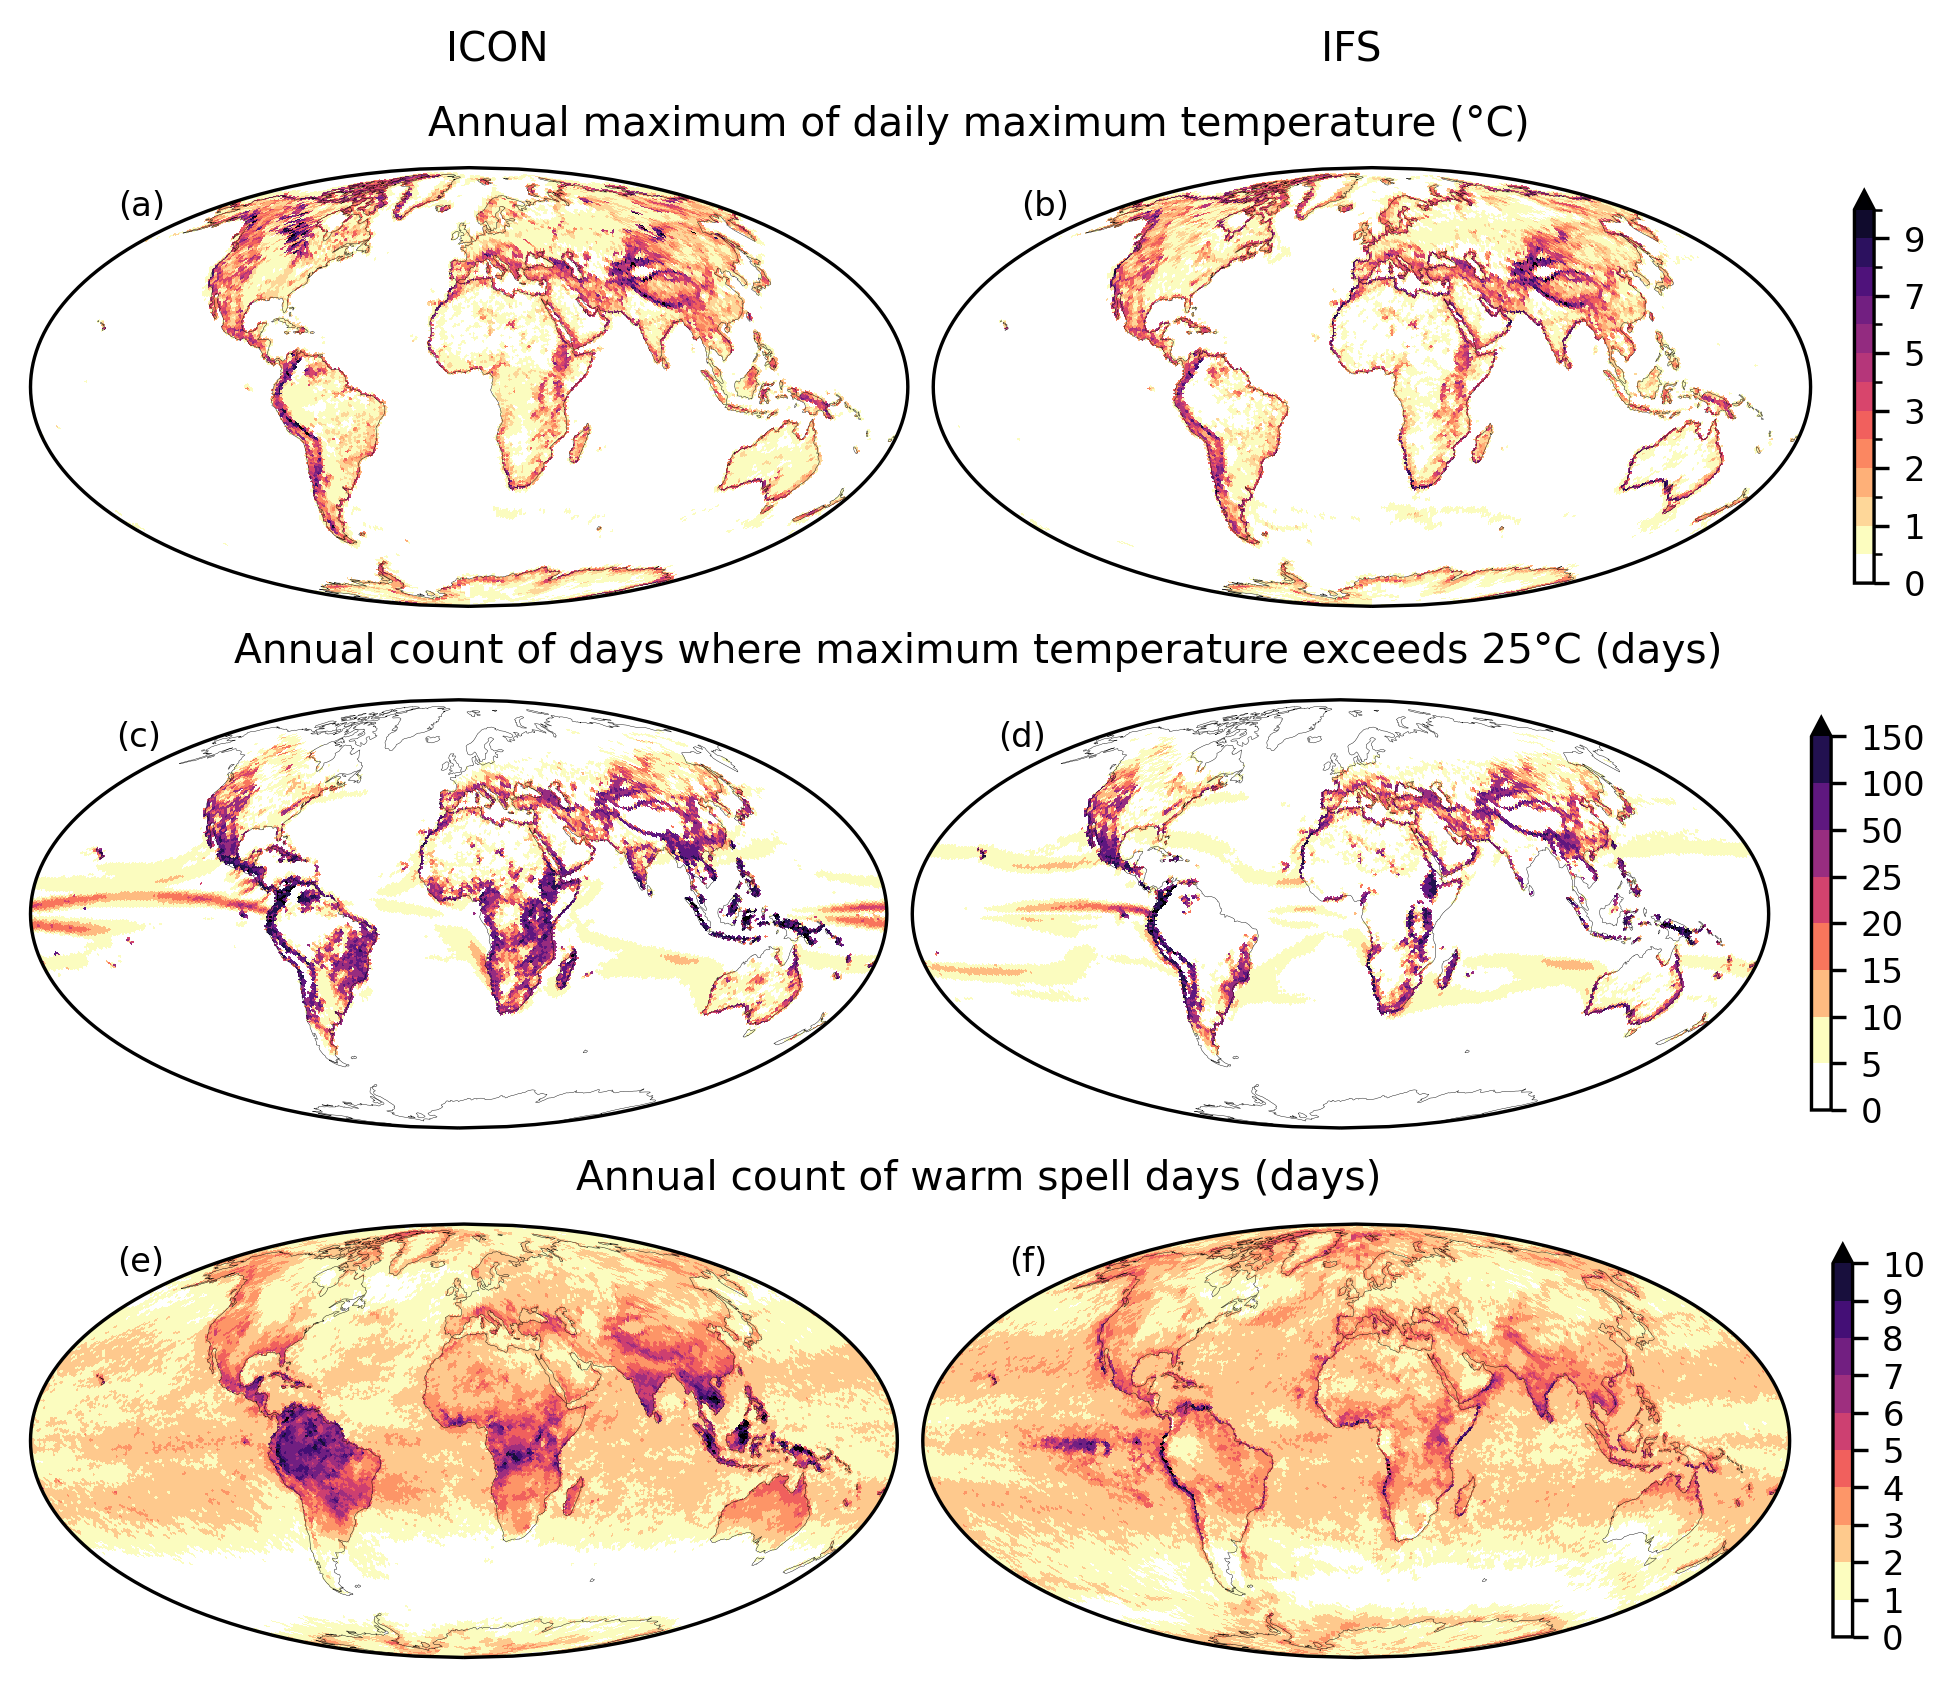

In [48]:
dpi = 305  # NOTE: depending on the exact resolutoin there sometimes is a an atrifact at the zero meridian

fig = plt.figure(layout='constrained', figsize=(16*cm, 14*cm), dpi=dpi)
fig.suptitle('ICON' + ' ' * 60 + 'IFS' + ' '*10 + '\n')

subfigs = fig.subfigures(nrows=3, ncols=1)

idx = 0
for index, subfig in zip(data_dict, subfigs):
    
    subfig.suptitle(title_dict[index], y=.97, va='bottom')
    
    axes = subfig.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj})

    for model, ax in zip(data_dict[index], axes):
        ax.text(0.1, .95, label_dict[idx], ha='left', va='top', transform=ax.transAxes)
        ax.set_global()
        default_plot(data_dict[index][model], ax=ax, add_colorbar=False if idx % 2 == 0 else True, **kwargs_dict[index])
        idx += 1

fig.savefig(os.path.join(figpath, 'figure2.png'), dpi=dpi)
fig.savefig(os.path.join(figpath, 'figure2.pdf'), dpi=dpi)